In [1]:
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
from PIL import Image # PIL: Python Imaging Library
import urllib.request 

### 00. 이미지 불러오기

size: (520, 346)
first five pixels: [(251, 253, 252), (250, 252, 251), (250, 252, 251), (250, 252, 251), (251, 253, 252)]


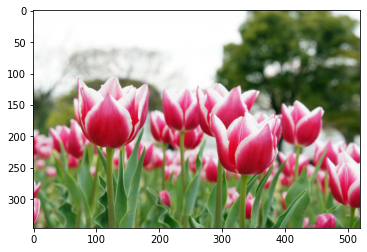

In [7]:
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/jaehosung/ml4se/main/photo.jpg", "flower.jpg"
)
im = Image.open("flower.jpg")
print("size:", im.size)  # 520x346 픽셀의 이미지
plt.imshow(im)

# 이미지 데이터 [r,g,b]의 w*h길이의 1차원 배열을 image_data에 저장
image_data = list(im.convert("RGB").getdata()) 
    # 179920(520x346) 개의 (r,g,b) 튜플 list
print("first five pixels:", image_data[:5])

### 00. k-평균법

In [ ]:
'''
fit_k_means(image_data, K)
    mu_lists = set_initial_mu()
    mu_lists = calc_new_mu_lists(mu_lists)
    err = calc_err(mu_list)

TODO 함수 구현
set_initial_center(k) 초기 값 생성 (클러스터 갯수만큼)
fit_k_means()

'''

In [ ]:
def fit_k_means(image_data,K):
    def set_initial_mu():
        mu_initial_list = np.random.randint(256,size=(K,3)) # [[r,g,b],...[r,g,b]]
        #TODO
        # print("Initial centers:", mu_initial_list)
        print("Initial centers:", [x.tolist() for x in mu_initial_list])
        print("========================")
        
        return mu_initial_list
    def calc_new_mu_lists():
        

    mu_lists = set_initial_mu()
    mu_lists = calc_new_mu_lists(mu_lists)
    clustered_image_data = calc_clustered_image_data()
    err = calc_err(mu_list)

    return clustered_image_data, mu_lists, err

In [3]:
# K개 클러스터의 대표점 (r,g,b) 임의로 생성
def generate_random_rgb(K):
    # 대표점 랜덤 설정
    mu_initial_list = np.random.randint(256,size=(K,3)) # [[r,g,b],...[r,g,b]]
    
    # 대표점 출력
    print("Initial centers:", end=" ")
    print([x.tolist() for x in mu_initial_list])
    print("========================")
    
    return mu_initial_list

In [4]:
#새로운 대표점(대표색)으로 이미지 변환하기
def calc_clustered_image_data(image_data, mu_list, mu_idx_list):  
    mu_list = np.array(mu_list, dtype=int) 
    new_image_data = [(0, 0, 0)] * len(image_data)  # 추출된 색으로 변환할 사진
    
    # 이미지 데이터의 각 픽셀을 대표점으로 대체
    for pixel_idx, point in enumerate(image_data):
        new_image_data[pixel_idx] = tuple(mu_list[mu_idx_list[pixel_idx]])
    return new_image_data

In [ ]:
# k-평균법 활용하여 새로운 대표점 계산
def calc_k_means(image_data, mu_initial_list, k, iteration_num):

    x_list = image_data # 트레이닝 셋으로 주어질 데이터 (1차원 [R,G,B] 데이터) 
    mu_list = mu_initial_list # 클러스터 대표점 리스트
    J = 0.0  # 데이터의 제곱 에러(square error) 총합

    # 반복해서 중심값 찾기
    for iter_num in range(iteration_num):
        mu_list_new = np.zeros((k,3))
        x_k_sum_list = np.zeros((k,3))  # 클러스터 k에 속하는 데이터 x의 합
        x_k_num = np.zeros(k)  # 클러스터 k에 속하는 데이터 개수

        J_new = 0.0
        mu_idx_list = np.zeros(len(x_list), dtype=int)

        # 각 데이터가 속한 그룹(대표 색상)을 찾기
        for pixel_idx, x in enumerate(x_list):  # x: [r,g,b]
            x = np.array(x)
            min_dist = 256 * 256 * 3  # 각 데이터의 제곱 에러값을 최대로 설정
            # 각 클러스터와의 제곱 거리를 계산하여 가장 가까운 클러스터 k 찾기
            for i in range(k):
                d = sum([x_i * x_i for x_i in x - mu_list[i]])  # r,g,b 각각 차이의 제곱 합
                if d < min_dist:
                    min_dist = d
                    mu_idx_list[pixel_idx] = i
            x_k_sum_list[mu_idx_list[pixel_idx]] += x
            x_k_num[mu_idx_list[pixel_idx]] += 1  
            J_new += min_dist  # 가장 가까운 클러스터와의 제곱 거리를 J에 더하기
            
        # 새로운 클러스터 대표점 계산하기
        cond = (x_k_num!=0)
        mu_list[cond] = x_k_sum_list[cond]/x_k_num[cond][:,np.newaxis]
        
        print("itration: %d" % (iter_num + 1))
        print("New centers:", end=" ")
        print([x.tolist() for x in mu_list])
        print("Num of data in each cluster:", end=" ")
        print(x_k_num)
        print("J=%d" % J_new)
        print("========================")

        # J의 변화가 0.1%미만되면 종료
        if iter_num > 0 and J - J_new < J * 0.001:
            print("J difference < 0.1%")
            print("Iteration ends")
            print("========================")
            break
        J = J_new

    return mu_list, mu_idx_list

In [ ]:
# 파라미터 설정
cluster_num = 3
iteration_num = 30
print("========================")
print("Number of clusters: K=%d" % cluster_num)
print("========================")

mu_initial_list = generate_random_rgb(cluster_num) 
mu_list, mu_idx_list = calc_k_means(image_data, mu_initial_list, cluster_num, iteration_num) 
image_data_clustered = calc_clustered_image_data(image_data, mu_list, mu_idx_list)


Number of clusters: K=3
Initial centers: [[12, 241, 108], [140, 139, 1], [161, 232, 243]]
itration: 1
New centers: [[113, 167, 123], [112, 95, 63], [232, 218, 221]]
Num of data in each cluster: [1.40000e+01 1.08223e+05 7.16830e+04]
J=2021712589
itration: 2
New centers: [[143, 149, 114], [107, 84, 53], [237, 223, 228]]
Num of data in each cluster: [25207. 88651. 66062.]
J=794591796
itration: 3
New centers: [[158, 134, 114], [97, 81, 46], [238, 229, 232]]
Num of data in each cluster: [41398. 76572. 61950.]
J=678159317
itration: 4
New centers: [[166, 125, 114], [90, 84, 44], [239, 231, 233]]
Num of data in each cluster: [46999. 72404. 60517.]
J=626198244
itration: 5
New centers: [[171, 118, 112], [86, 88, 44], [239, 231, 233]]
Num of data in each cluster: [48255. 71421. 60244.]
J=607366730
itration: 6
New centers: [[174, 113, 110], [83, 92, 45], [238, 231, 233]]
Num of data in each cluster: [48494. 70917. 60509.]
J=597420270
itration: 7
New centers: [[176, 108, 108], [82, 94, 46], [238, 

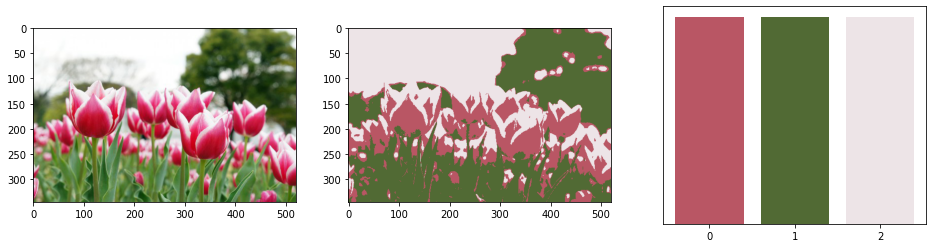

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# 기존 이미지 시각화
im.putdata(image_data)
axs[0].imshow(im)

# 변환된 이미지 시각화
im.putdata(image_data_clustered)  # k-평균법을 사용하여 추출한 색으로 이루어진 사진으로 이미지 업데이트
axs[1].imshow(im)

axs[2].set_xticks(np.arange(0, len(mu_list), 1.0))
axs[2].set_yticks([])
# 추출된 색 시각화
for idx, rgb in enumerate(mu_list):
    axs[2].bar(idx, 1, color=np.array(rgb) / 255)

석형 코드

In [ ]:
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
from PIL import Image # PIL: Python Imaging Library
import urllib.request 

Image size: (520, 346)


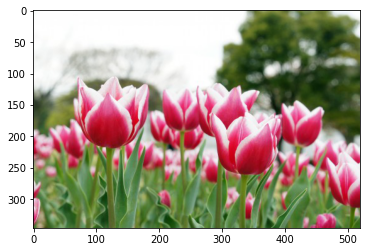

In [ ]:
# 이미지 불러오기
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/jaehosung/ml4se/main/photo.jpg", 
    "flower.jpg"
)
im = Image.open("flower.jpg")
print("Image size:", end=" ") # 530x346 이미지
print(im.size)  
plt.imshow(im)

# 이미지를 각 픽셀의 RGB 값을 가지는 1차원 list로 변환. 
image_data = list(im.convert("RGB").getdata())  
    # 179920(520x346) 길이의 (r,g,b) 튜플 list

In [ ]:
def calc_closest_cluster(x, mu_list):
    min_sq_dist = 256 * 256 * 3
    k = 0 # cluster index
    K = len(mu_list)
    
    for j in range(K):
        mu_j = mu_list[j]
        sq_dist = sum([x_i * x_i for x_i in x - mu_j])
        if sq_dist < min_sq_dist:
            min_sq_dist = sq_dist
            k = j
    
    return k, min_sq_dist

In [ ]:
def calc_new_clusters(x_list, mu_list):
    N = len(x_list)
    K = len(mu_list)
    
    mu_idx_list = np.zeros(N, dtype=int)
    x_sum_list = np.zeros((K,3))
    x_num_list = np.zeros(K, dtype=int)
    mu_list_new = [np.array([0,0,0])] * K
    J_new = 0.0
    
    for pixel_idx, x in enumerate(x_list):
        #x = np.array(x) # tuple -> ndarray
        k, min_sq_dist = calc_closest_cluster(x, mu_list)
        mu_idx_list[pixel_idx] = k
        x_sum_list[k] += x
        x_num_list[k] += 1  
        J_new += min_sq_dist  

    for i in range(K):
        if x_num_list[i] is not 0:  # 0으로 나누는 에러를 방지
            mu_list_new[i] = np.array(x_sum_list[i] / x_num_list[i], dtype=int) 
    
    return mu_list_new, J_new, mu_idx_list, x_num_list

In [ ]:
# k-평균법 활용하여 클러스터링
def calc_k_means(image_data, K, MAX_ITER_NUM):

    x_list = image_data 
        # 트레이닝 셋 데이터: (1차원 [(R,G,B)] list) 
    mu_list = np.random.randint(256,size=(K,3)) 
        # 클러스터 대표점 리스트 [[r,g,b],...[r,g,b]] 
        # 임의의 값으로 초기화.  
    J = 0.0  # 제곱 에러(square error)

    for iter_num in range(MAX_ITER_NUM):
        mu_list_new, J_new, mu_idx_list, x_num_list = calc_new_clusters(x_list, mu_list)
        
        print("itration: %d" % (iter_num + 1))
        print("New centers:", end=" ")
        print([x.tolist() for x in mu_list_new])
        print("Num of data in each cluster:", end=" ")
        print(x_num_list)
        print("J=%d" % J_new)
        print("========================")

        # J의 변화가 0.1% 미만이면 종료
        if iter_num > 0 and J - J_new < J * 0.001:
            mu_list = mu_list_new

            print("J difference < 0.1%")
            print("Iteration ends")
            print("========================")
            break

        mu_list = mu_list_new
        J = J_new
        
    return mu_list, mu_idx_list

In [ ]:
# 클러스터링된 대표색으로 새로운 이미지 생성.
# mu_list: {mu_k}, mu for each cluster (K clusters)
# mu_idx_list: {k_n}, k for each x_n (N points)
def calc_clustered_image_data(mu_list, mu_idx_list): 
  
    new_image_data = [(0, 0, 0)] * len(mu_idx_list)
    for pixel_idx, point in enumerate(mu_idx_list):
        new_image_data[pixel_idx] = tuple(mu_list[mu_idx_list[pixel_idx]])
    
    return new_image_data

In [ ]:
# 파라미터 설정
K = 3 # the number of clusters
MAX_ITER_NUM = 30

print("========================")
print("Number of clusters: K=%d" % K)
print("========================")

# k-평균법 실행
mu_list, mu_idx_list = calc_k_means(image_data, K, MAX_ITER_NUM) 
  # mu_list: {mu_k}, mu for each cluster (K clusters)
  # mu_idx_list: {k_n}, k for each x_n (N points)
clustered_image_data = calc_clustered_image_data(mu_list, mu_idx_list)

Number of clusters: K=3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in long_scalars
  


itration: 1
New centers: [[-9223372036854775808, -9223372036854775808, -9223372036854775808], [106, 92, 57], [225, 208, 210]]
Num of data in each cluster: [    0 98832 81088]
J=1587787477
itration: 2
New centers: [[28, 54, 17], [117, 99, 65], [232, 215, 219]]
Num of data in each cluster: [ 8113 98272 73535]
J=891212800
itration: 3
New centers: [[44, 70, 25], [130, 103, 74], [234, 219, 223]]
Num of data in each cluster: [22621 87185 70114]
J=744725237
itration: 4
New centers: [[53, 78, 30], [139, 105, 80], [235, 222, 226]]
Num of data in each cluster: [32384 79866 67670]
J=677053365
itration: 5
New centers: [[60, 84, 34], [146, 105, 85], [236, 224, 228]]
Num of data in each cluster: [40514 73328 66078]
J=644801207
itration: 6
New centers: [[65, 88, 37], [153, 105, 89], [236, 226, 229]]
Num of data in each cluster: [47246 67721 64953]
J=624525215
itration: 7
New centers: [[69, 91, 40], [158, 104, 93], [237, 227, 230]]
Num of data in each cluster: [53107 62704 64109]
J=610665034
itration:

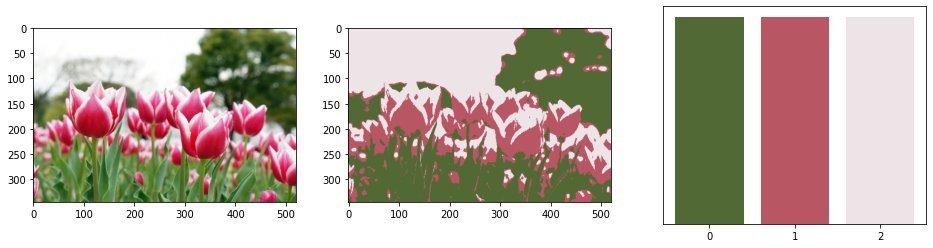

In [ ]:
# 그림으로 결과 출력
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# 기존 이미지 시각화
im.putdata(image_data)
axs[0].imshow(im)

# 클러스터링 이미지 시각화
im.putdata(clustered_image_data)  # k-평균법 사용하여 추출한 색만으로 이루어진 이미지
axs[1].imshow(im)

# 추출된 색 시각화
axs[2].set_xticks(np.arange(0, len(mu_list), 1.0))
axs[2].set_yticks([])
for idx, rgb in enumerate(mu_list):
    axs[2].bar(idx, 1, color=np.array(rgb) / 255)